<center><h1>Traffic Sign Classification</h1></center>

In [79]:
# Importing Libraries
import numpy as np
import pandas as pd
from PIL import Image
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from plot_keras_history import show_history, plot_history
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random

In [5]:
# The directory path for Mini Project Folder
directory_path = r'D:\studies\Mini Project'

In [6]:
images = []
image_labels = []

# Setting image_height and image_width
image_height = 35
image_width = 35

In [7]:
train_df = pd.read_csv('D:\studies\Mini Project\Train.csv')

In [8]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [9]:
# function to open and return the resized image
def get_image(img_path, height, width):
    image = Image.open(img_path)
    resized_image = image.resize((height, width))
    return resized_image


In [10]:
# storing the image and its label
for index in range(train_df.shape[0]):
    try:
        img_path = train_df.loc[index, 'Path']
        img_label = train_df.loc[index, 'ClassId']
        
        image_path = directory_path+ '\\' + img_path
        
        image = get_image(image_path, image_height, image_width)
        image_array = np.array(image)
        images.append(image_array)
        image_labels.append(img_label)

    except:
        pass

In [72]:
def plot_images(images, image_labels):
    plt.figure(figsize = (25,25))
    for i in range(1, 26):
        plt.subplot(5, 5, i)
        random_index = random.randint(0, len(image_labels))
        image = Image.fromarray(images[random_index])
        plt.imshow(image)
        plt.xlabel("Class : "+str(image_labels[random_index]), fontsize = 20)

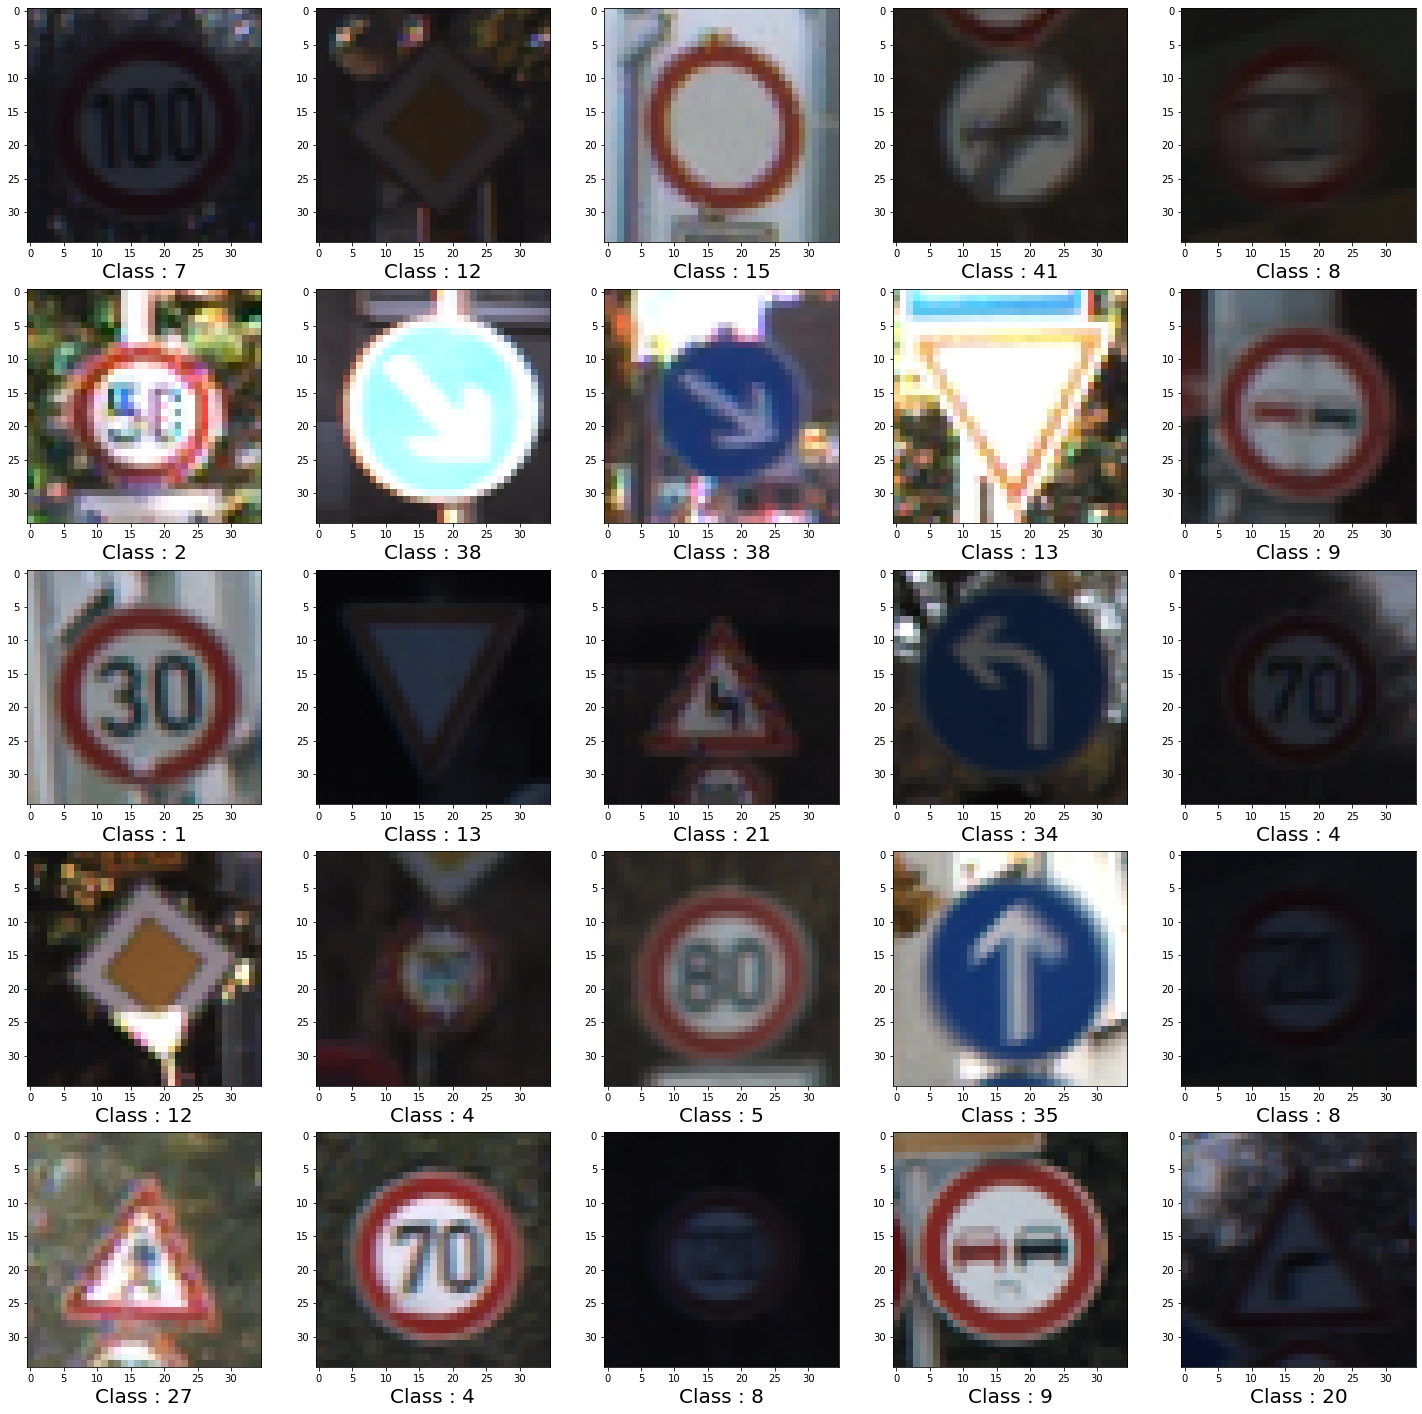

In [73]:
# plotting some random images with their classes from training set
plot_images(images, image_labels)

In [25]:
# Loading Meta Dataframe which contains all the unique classes 
meta_df = pd.read_csv(directory_path + '//' + '/Meta.csv')

In [26]:
meta_df.head()

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [27]:
# number of class labels in the given dataset
number_of_unique_signs = meta_df['ClassId'].shape[0]

In [28]:
# Randomly shuffling the indexes for splitting
indexes = np.arange(len(images))
np.random.shuffle(indexes)

In [29]:
# Converting python lists into numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

In [30]:
# Splitting the train set into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(images, image_labels, test_size=0.2)

In [31]:
# Normalising the data
X_train = X_train/255.0
X_val = X_val/255.0

In [32]:
# One hot Encoding the class labels
y_train = pd.get_dummies(y_train)
y_val = pd.get_dummies(y_val)

In [34]:
# CNN-Model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [78]:
# Printing the summary of our CNN model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 33, 33, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [35]:
# Fitting the model with training data and validating it with the validation data
epochs = 10
try:
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=32)
except Exception as e:
    print(e)

Epoch 1/10
981/981 [==============================] - 179s 181ms/step - loss: 1.1835 - accuracy: 0.6596 - val_loss: 0.1257 - val_accuracy: 0.9704
Epoch 2/10
981/981 [==============================] - 171s 174ms/step - loss: 0.1996 - accuracy: 0.9383 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 3/10
981/981 [==============================] - 173s 176ms/step - loss: 0.1121 - accuracy: 0.9647 - val_loss: 0.0366 - val_accuracy: 0.9897
Epoch 4/10
981/981 [==============================] - 156s 159ms/step - loss: 0.0905 - accuracy: 0.9721 - val_loss: 0.0242 - val_accuracy: 0.9931
Epoch 5/10
981/981 [==============================] - 121s 123ms/step - loss: 0.0749 - accuracy: 0.9776 - val_loss: 0.0188 - val_accuracy: 0.9948
Epoch 6/10
981/981 [==============================] - 121s 123ms/step - loss: 0.0633 - accuracy: 0.9804 - val_loss: 0.0159 - val_accuracy: 0.9958
Epoch 7/10
981/981 [==============================] - 120s 122ms/step - loss: 0.0530 - accuracy: 0.9832 - val_loss: 0.0193 -

In [43]:
# Testing Phase
# Loading the testing set images
data = []
test_df = pd.read_csv(directory_path + "/Test.csv")
for index in range(test_df.shape[0]):
    img_path = test_df.loc[index, 'Path']
    current_path = directory_path + '//' + img_path
    image = get_image(current_path, image_height, image_width)
    image_array = np.array(image)
    data.append(image_array)

In [44]:
# Normalising the test set
X_test = np.array(data)
X_test = X_test/255.0

In [45]:
# Storing the ground truths of the test set
y_test = test_df.loc[:,'ClassId']
# Predicting the class label and storing it in y_pred
y_pred = np.argmax(model.predict(X_test), axis=1)

In [46]:
# Printing the accuracy of our model
print(accuracy_score(y_test,y_pred)*100)

97.62470308788599


In [30]:
# Saving our model in model.h5
model.save("model.h5")

In [2]:
# Loading our model from model.h5 file
Model = load_model("model.h5")

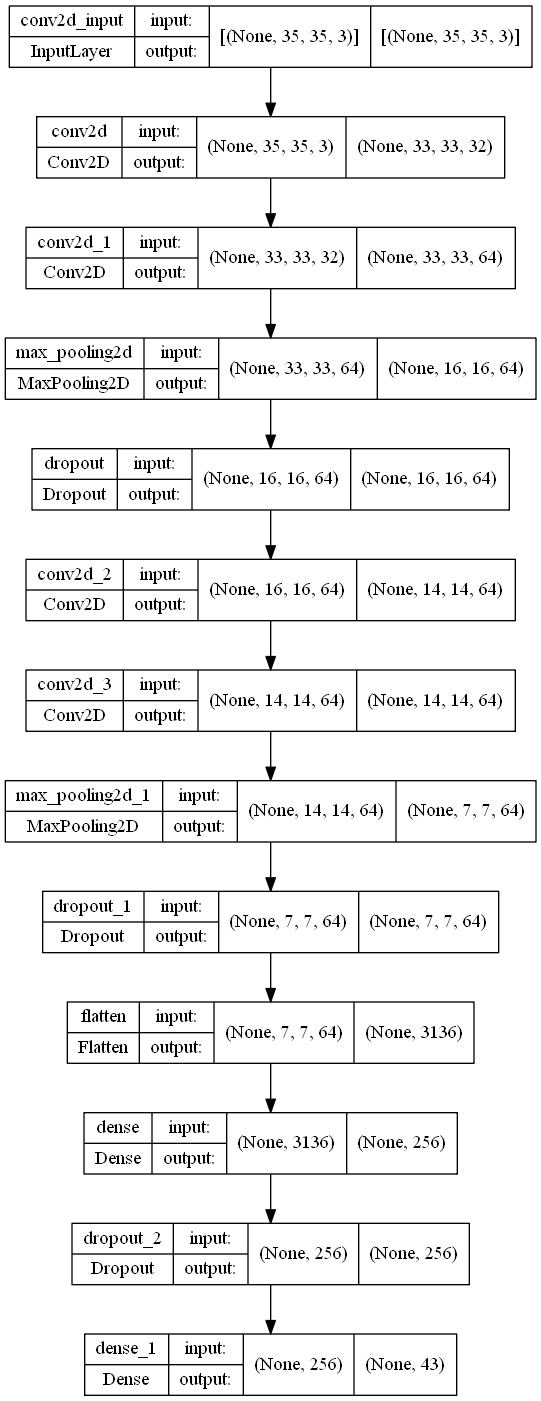

In [3]:
# Plotting our CNN model
img_file_path = r"D:\studies\Mini Project\model.png"
plot_model(Model, to_file = img_file_path, show_layer_names=True, show_shapes = True)

In [74]:
def plot_test_images(images, y_test, y_pred, no_of_images):
    plt.figure(figsize = (25,25))
    for i in range(1, no_of_images+1):
        plt.subplot(5, 5, i)
        random_index = random.randint(0, len(y_test))
        image = Image.fromarray(images[random_index])
        
        actual_class = y_test[random_index]
        predicted_class = y_pred[random_index]
        
        color = "g"
        if(actual_class != predicted_class):
            color = "r"
        
        plt.imshow(image)
        plt.xlabel(f"class : {actual_class} || Predicted : {predicted_class}", loc = "center", fontsize = 15, color = color)


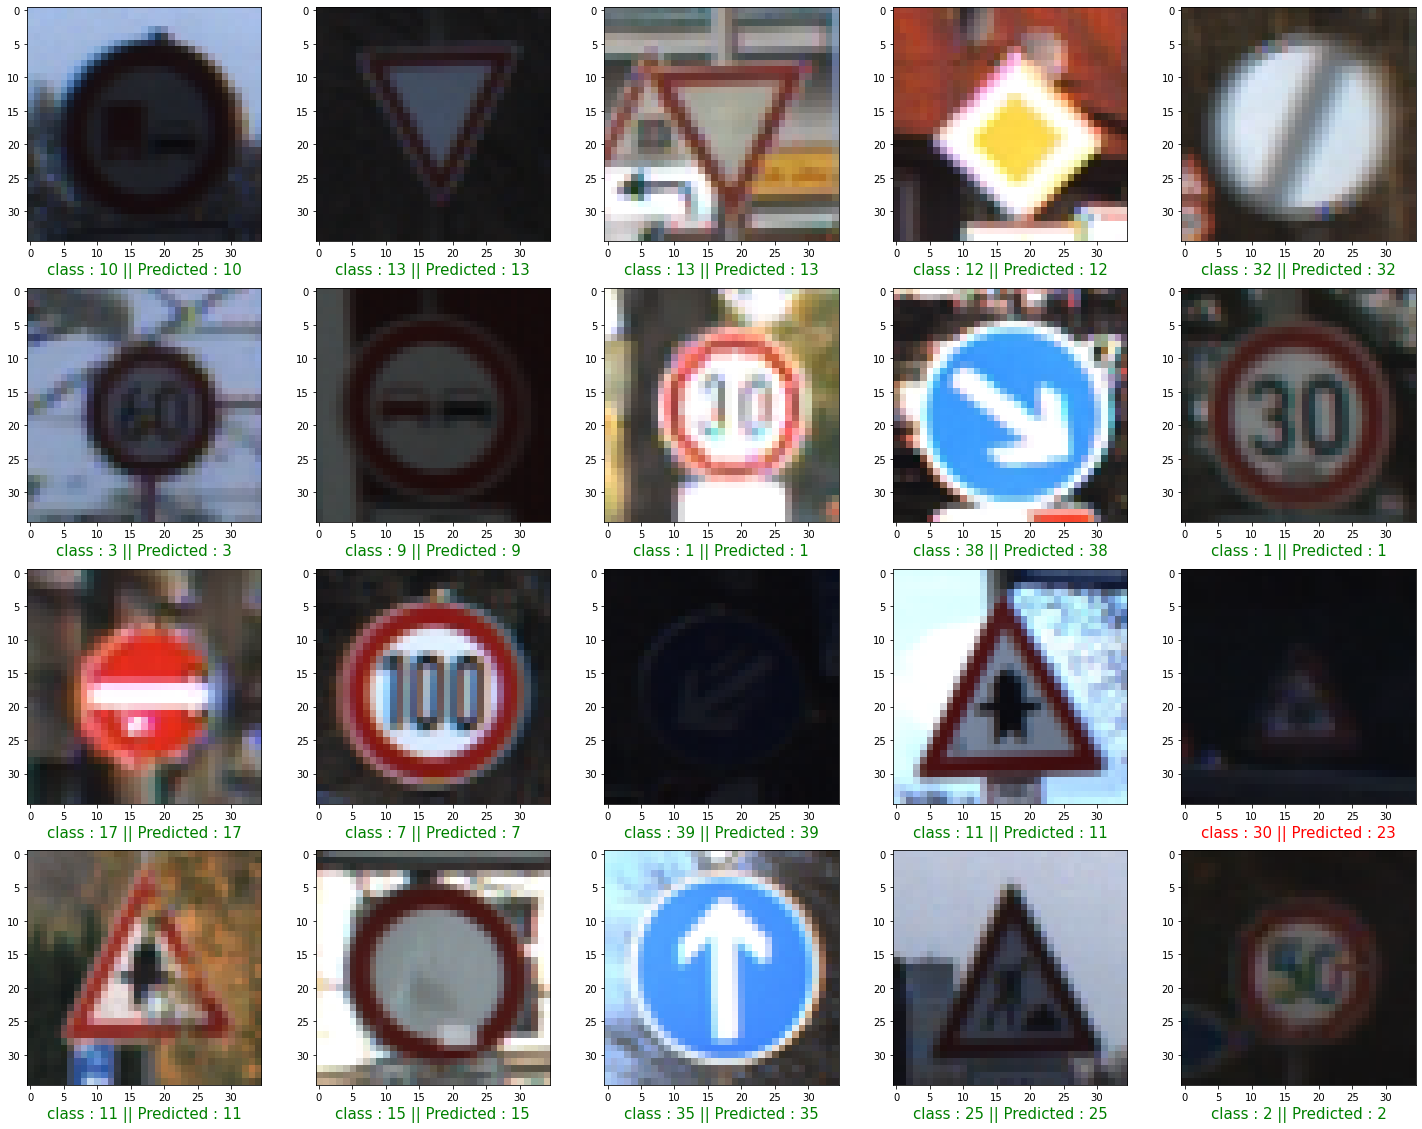

In [77]:
# Plotting the test set images randomly with their actual and predicted classes
no_of_images = 20
plot_test_images(data, y_test, y_pred, no_of_images)

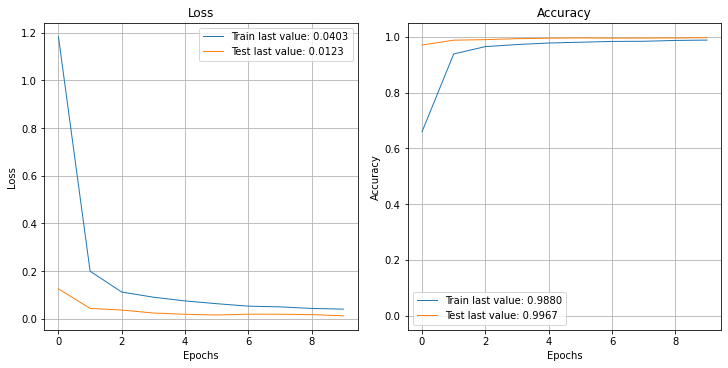

In [40]:
# Plotting the figures of Loss and Accuracy of the model
show_history(history)
plot_history(history, path="standard.png")
plt.close()

In [52]:
# Total Classification report of our model for the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.95      0.99      0.97       720
           2       0.98      0.99      0.99       750
           3       0.98      0.98      0.98       450
           4       0.99      0.99      0.99       660
           5       0.96      0.97      0.97       630
           6       1.00      0.89      0.94       150
           7       0.99      0.98      0.99       450
           8       0.99      0.96      0.98       450
           9       0.97      1.00      0.99       480
          10       1.00      1.00      1.00       660
          11       1.00      1.00      1.00       420
          12       0.99      0.96      0.97       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.94      1.00      0.97       210
          16       0.99      1.00      1.00       150
          17       1.00    